In [772]:
import pandas as pd                     #Load libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas import Series
from scipy import stats
import requests, re
from scipy.stats import norm
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge

In [165]:
#Data cleaning and exploration

In [166]:
movie_data = pd.DataFrame(pd.read_csv('/Users/smokha/Downloads/DSCS/movie_data_cs.csv'))   #Load data

In [167]:
movie_data.head()     #Check data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [168]:
movie_data.shape      #Check number of rows and columns

(5043, 28)

In [169]:
movie_data.info()  #Information about movie columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_movie_link             5043 non-

In [170]:
movie_data.isna().sum()        #Null values

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_movie_link               0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
movie_score                    0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [171]:
movie_data.groupby('color')['color'].count()    #Distribution check

color
 Black and White     209
Color               4815
Name: color, dtype: int64

In [172]:
movie_data['color'] = movie_data['color'].fillna('Color')         #Fill null values

In [173]:
movie_data['director_name'] = movie_data['director_name'].fillna('Unknown/Multiple')    #Fill null values

In [174]:
duration = movie_data[~movie_data['duration'].isna()]      #Considering only complete data for duration

{'whiskers': [<matplotlib.lines.Line2D at 0x1c2703c860>,
 'caps': [<matplotlib.lines.Line2D at 0x1c2703cef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c26f59630>],
 'medians': [<matplotlib.lines.Line2D at 0x1c26f3b2b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c26f3b8d0>],
 'means': []}

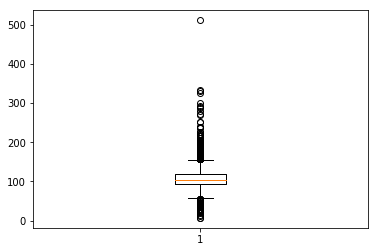

In [175]:
plt.boxplot(duration['duration'])   #Boxplot

In [176]:
duration['duration'].describe()     #Stats for duration column

count    5028.000000
mean      107.201074
std        25.197441
min         7.000000
25%        93.000000
50%       103.000000
75%       118.000000
max       511.000000
Name: duration, dtype: float64

In [177]:
movie_data['duration'] = movie_data['duration'].fillna(duration['duration'].mean())   #Fill null values with mean

In [178]:
movie_data['num_critic_for_reviews'] = movie_data['num_critic_for_reviews'].fillna(0)
movie_data['director_facebook_likes'] = movie_data['director_facebook_likes'].fillna(0)    #Fill null values with 0
movie_data['actor_1_facebook_likes'] = movie_data['actor_1_facebook_likes'].fillna(0)
movie_data['actor_2_facebook_likes'] = movie_data['actor_2_facebook_likes'].fillna(0)
movie_data['actor_3_facebook_likes'] = movie_data['actor_3_facebook_likes'].fillna(0)
movie_data['facenumber_in_poster'] = movie_data['facenumber_in_poster'].fillna(0)
movie_data['num_user_for_reviews'] = movie_data['num_user_for_reviews'].fillna(0)

In [179]:
movie_data['actor_1_name'] = movie_data['actor_1_name'].fillna('Unknown')
movie_data['actor_2_name'] = movie_data['actor_2_name'].fillna('Unknown')     #Fill null values
movie_data['actor_3_name'] = movie_data['actor_3_name'].fillna('Unknown')

In [180]:
movie_data.groupby('language')['language'].count()     #Count of languages

language
Aboriginal       2
Arabic           5
Aramaic          1
Bosnian          1
Cantonese       11
Chinese          3
Czech            1
Danish           5
Dari             2
Dutch            4
Dzongkha         1
English       4704
Filipino         1
French          73
German          19
Greek            1
Hebrew           5
Hindi           28
Hungarian        1
Icelandic        2
Indonesian       2
Italian         11
Japanese        18
Kannada          1
Kazakh           1
Korean           8
Mandarin        26
Maya             1
Mongolian        1
None             2
Norwegian        4
Panjabi          1
Persian          4
Polish           4
Portuguese       8
Romanian         2
Russian         11
Slovenian        1
Spanish         40
Swahili          1
Swedish          5
Tamil            1
Telugu           1
Thai             3
Urdu             1
Vietnamese       1
Zulu             2
Name: language, dtype: int64

In [181]:
movie_data['language'] = movie_data['language'].fillna('English')   #Fill null values

In [182]:
movie_data.groupby('country')['country'].count()        #Check distribution

country
Afghanistan                1
Argentina                  4
Aruba                      1
Australia                 55
Bahamas                    1
Belgium                    4
Brazil                     8
Bulgaria                   1
Cambodia                   1
Cameroon                   1
Canada                   126
Chile                      1
China                     30
Colombia                   1
Czech Republic             3
Denmark                   11
Dominican Republic         1
Egypt                      1
Finland                    1
France                   154
Georgia                    1
Germany                   97
Greece                     2
Hong Kong                 17
Hungary                    2
Iceland                    3
India                     34
Indonesia                  1
Iran                       4
Ireland                   12
                        ... 
Libya                      1
Mexico                    17
Netherlands                5
New Li

In [183]:
movie_data['country'] = movie_data['country'].fillna('USA')  #Fill null values

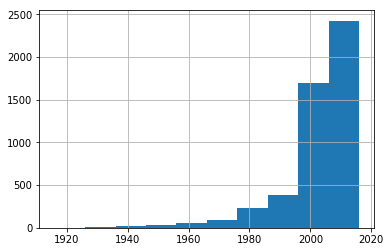

In [184]:
movie_data['title_year'].hist()       #Check distribution

In [185]:
movie_data = movie_data[~movie_data['title_year'].isna()]  #Most rows with empty title year are documentries or series 
#Most rows with empty title year do not have gross or budget

In [186]:
movie_data.groupby('content_rating')['content_rating'].count()  #Check distribution

content_rating
Approved       55
G             112
GP              6
M               5
NC-17           7
Not Rated     115
PG            701
PG-13        1461
Passed          9
R            2118
TV-14           3
TV-G            4
TV-PG           3
Unrated        62
X              13
Name: content_rating, dtype: int64

In [187]:
movie_data['content_rating'] = movie_data['content_rating'].fillna('Unrated') #Fill null values

In [188]:
del movie_data['aspect_ratio']         #Remove unecessary column

In [189]:
movie_data.isna().sum()      #Null value check

color                          0
director_name                  0
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                   0
actor_1_facebook_likes         0
gross                        779
genres                         0
actor_1_name                   0
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                   0
facenumber_in_poster           0
plot_keywords                140
movie_movie_link               0
num_user_for_reviews           0
language                       0
country                        0
content_rating                 0
budget                       392
title_year                     0
actor_2_facebook_likes         0
movie_score                    0
movie_facebook_likes           0
dtype: int64

In [190]:
movie_data.shape     #Check rows and columns left

(4935, 27)

In [191]:
def link_replacer(link):             #Replace movies URL with IMDB URL
    link = link.replace('http://www.movie.com/title/', 'https://www.imdb.com/title/')
    link = link.replace('/?ref_=fn_tt_tt_1', '/')
    return link


def budget_extractor(link):           #Webscrape data from IMDB to get budget value  
    
    print(link)
    r = requests.get(link)
    if re.search('<h4 class="inline">Budget:</h4>(.*?)<span class="attribute">',r.text, re.DOTALL) is None:
        return np.NAN
    content = re.search('<h4 class="inline">Budget:</h4>(.*?)<span class="attribute">',r.text,re.DOTALL).group(1)
    content = re.sub('\W+','', content)
    content = re.search(r'\d+', content).group()
    content = int(content)
    return content


def gross_extractor(link):         #Webscrape data from IMDB to get gross value
    print(link)
    r = requests.get(link)
    if re.search('<h4 class="inline">Gross USA:</h4>(.*?)</div>',r.text, re.DOTALL) is None:
                                                    #Check if Gross USA values exists
        if re.search('<h4 class="inline">Cumulative Worldwide Gross:</h4>(.*?)</div>',r.text, re.DOTALL) is None:
            return np.NAN                       #Check if Cummulative Gross values exists
        else:
            content = re.search('<h4 class="inline">Cumulative Worldwide Gross:</h4>(.*?)</div>',r.text,re.DOTALL).group(1)
            content = re.sub('\W+','', content)
            content = re.search(r'\d+', content).group()
            content = int(content)
            return content
    else:
        content = re.search('<h4 class="inline">Gross USA:</h4>(.*?)</div>',r.text,re.DOTALL).group(1)
        content = re.sub('\W+','', content)
        content = re.search(r'\d+', content).group()
        content = int(content)
        return content


In [163]:
#movie_data['movie_movie_link'] = movie_data['movie_movie_link'].apply(lambda x: link_replacer(x))

#gross = movie_data[~movie_data['gross'].isna()]
#nt_gross = movie_data[movie_data['gross'].isna()]
#nt_gross['gross'] = nt_gross['movie_movie_link'].apply(lambda x: gross_extractor(x))
#mv1 = pd.concat([gross, nt_gross], ignore_index = True)

#budget = mv1[~mv1['budget'].isna()]
#nt_budget = mv1[mv1['budget'].isna()]
#nt_budget['budget'] = nt_budget['movie_movie_link'].apply(lambda x: budget_extractor(x))
#mv2 = pd.concat([budget, nt_budget], ignore_index = True)

#movie_data = mv2

#movie_data.isna().sum()

https://www.imdb.com/title/tt1321869/
https://www.imdb.com/title/tt4262980/
https://www.imdb.com/title/tt1680310/
https://www.imdb.com/title/tt4262980/
https://www.imdb.com/title/tt1571403/
https://www.imdb.com/title/tt0463872/
https://www.imdb.com/title/tt2638144/
https://www.imdb.com/title/tt0078754/
https://www.imdb.com/title/tt0083767/
https://www.imdb.com/title/tt4291590/
https://www.imdb.com/title/tt4057916/
https://www.imdb.com/title/tt0087985/
https://www.imdb.com/title/tt4591310/
https://www.imdb.com/title/tt2479478/
https://www.imdb.com/title/tt0056193/
https://www.imdb.com/title/tt0160184/
https://www.imdb.com/title/tt0473553/
https://www.imdb.com/title/tt0083944/
https://www.imdb.com/title/tt0069293/
https://www.imdb.com/title/tt0084132/
https://www.imdb.com/title/tt0063829/
https://www.imdb.com/title/tt0249516/
https://www.imdb.com/title/tt1220911/
https://www.imdb.com/title/tt0961097/
https://www.imdb.com/title/tt2911342/
https://www.imdb.com/title/tt0437954/
https://www.

KeyboardInterrupt: 

In [ ]:
movie_data.to_csv('movie_cln_v4.csv')     #Save data

In [ ]:
movie_data = pd.DataFrame(pd.read_csv('/Users/smokha/Downloads/DSCS/movie_cln_v5.csv'))

In [ ]:
movie_data = movie_data.drop(columns=['color', 'Unnamed: 0'])   #Remove unnecessary columns

In [ ]:
movie_data.shape

In [ ]:
movie_data.isna().sum()

In [ ]:
movie_data = movie_data.dropna(subset = ['gross', 'budget'], how = 'all')       #Drop null which exist in both gross AND budget

In [ ]:
movie_data.shape     #Check cleaned dataset

In [ ]:
movie_data_nn = movie_data.dropna(subset = ['gross'], how = 'all')
movie_data_nn = movie_data_nn.dropna(subset = ['budget'], how = 'all')

In [ ]:
movie_data_nn.shape       #Dataframe with no null values

In [ ]:
movie_data_nn.isna().sum()

In [ ]:
movie_data_nn.to_csv('movie_data_no_null.csv')

In [ ]:
movie_data.to_csv('movie_cln_v5.csv')

In [ ]:
movie_data_nn['net'] = movie_data_nn['gross'] - movie_data_nn['budget']

In [192]:
movie_data_nn = pd.DataFrame(pd.read_csv('/Users/smokha/Downloads/DSCS/movie_data_no_null.csv'))

In [193]:
movie_data_nn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4173 entries, 0 to 4172
Data columns (total 25 columns):
Unnamed: 0                   4173 non-null int64
director_name                4173 non-null object
num_critic_for_reviews       4173 non-null float64
duration                     4173 non-null float64
director_facebook_likes      4173 non-null float64
actor_3_facebook_likes       4173 non-null float64
actor_2_name                 4173 non-null object
actor_1_facebook_likes       4173 non-null float64
gross                        4173 non-null float64
genres                       4173 non-null object
actor_1_name                 4173 non-null object
movie_title                  4173 non-null object
num_voted_users              4173 non-null int64
cast_total_facebook_likes    4173 non-null int64
actor_3_name                 4173 non-null object
facenumber_in_poster         4173 non-null float64
num_user_for_reviews         4173 non-null float64
language                     4173 non-

<Figure size 1800x800 with 0 Axes>

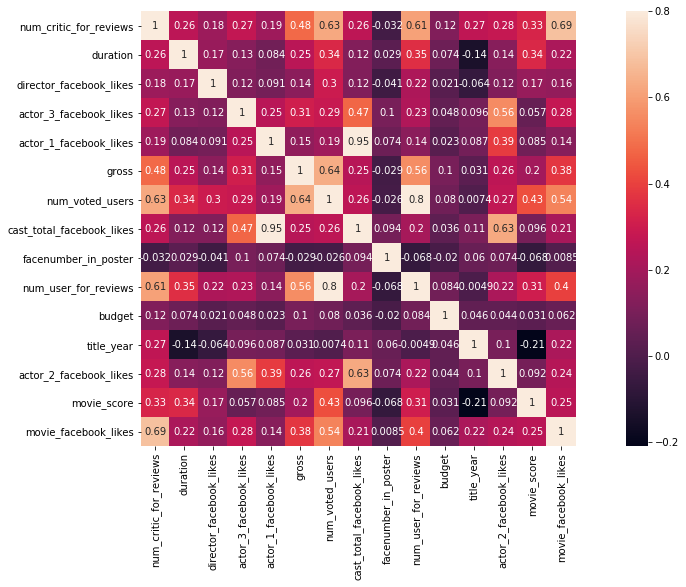

In [194]:
#Plotting heat map:
plt.figure(figsize=(18,8),dpi=100,)
plt.subplots(figsize=(18,8))
sns.heatmap(data=movie_data.corr(),square=True,vmax=0.8,annot=True)

<Figure size 1800x800 with 0 Axes>

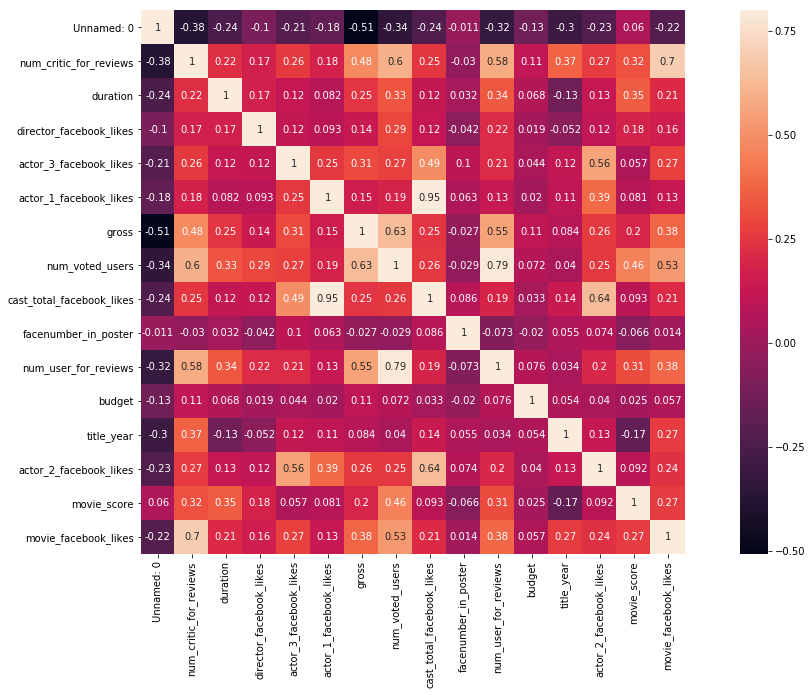

In [195]:
#Plotting heat map for all non null values:
plt.figure(figsize=(18,8),dpi=100,)
plt.subplots(figsize=(20,10))
sns.heatmap(data=movie_data_nn.corr(),square=True,vmax=0.8,annot=True)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


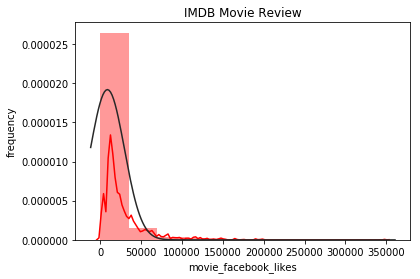

In [196]:
sns.distplot(a=movie_data_nn['movie_facebook_likes'],hist=True,bins=10,fit=norm,color="red")
plt.title("IMDB Movie Review")
plt.ylabel("frequency")         #Distribution of movie Facebook likes
plt.show()

In [197]:
mean, variance=norm.fit(movie_data_nn['movie_facebook_likes'])         

In [198]:
mean

8719.804696860772

In [199]:
variance

20781.503962344363

In [200]:
col_n = ['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'title_year', 'actor_2_facebook_likes', 'movie_score', 'movie_facebook_likes', 'net']

{'whiskers': [<matplotlib.lines.Line2D at 0x1c36265748>,
 'caps': [<matplotlib.lines.Line2D at 0x1c3664e278>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c36265eb8>],
 'medians': [<matplotlib.lines.Line2D at 0x1c364736d8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c36473f98>],
 'means': []}

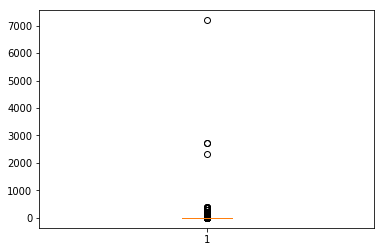

In [778]:
plt.boxplot(movie_data_nn['net']) #Distribution of net 

In [202]:
movie_data_nn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4173 entries, 0 to 4172
Data columns (total 25 columns):
Unnamed: 0                   4173 non-null int64
director_name                4173 non-null object
num_critic_for_reviews       4173 non-null float64
duration                     4173 non-null float64
director_facebook_likes      4173 non-null float64
actor_3_facebook_likes       4173 non-null float64
actor_2_name                 4173 non-null object
actor_1_facebook_likes       4173 non-null float64
gross                        4173 non-null float64
genres                       4173 non-null object
actor_1_name                 4173 non-null object
movie_title                  4173 non-null object
num_voted_users              4173 non-null int64
cast_total_facebook_likes    4173 non-null int64
actor_3_name                 4173 non-null object
facenumber_in_poster         4173 non-null float64
num_user_for_reviews         4173 non-null float64
language                     4173 non-

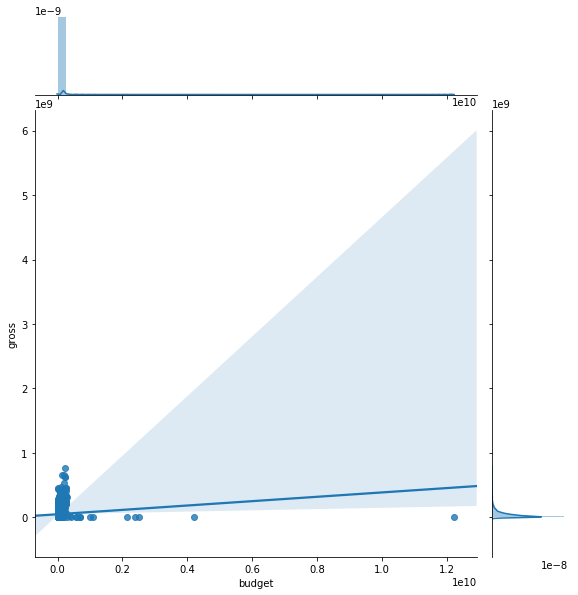

In [203]:
sns.jointplot(x=(movie_data_nn['budget']),y=(movie_data_nn['gross']),kind="reg", height=8.27) #Budget V/S Gross

In [204]:
data = movie_data_nn.drop(movie_data_nn[(movie_data_nn['budget']>200000000)].index).reset_index(drop=True)  #Remove outliers

In [205]:
del data['Unnamed: 0'] #Delete unecessary columns

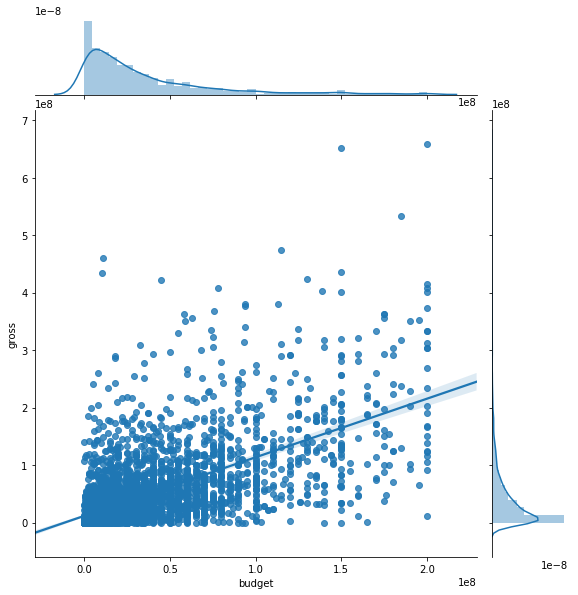

In [206]:
sns.jointplot(x=(data['budget']),y=(data['gross']),kind="reg", height=8.27)   #Higher budget can mean higher gross

In [207]:
data['budget'].corr(data['gross'])

0.6206510501408515

In [229]:
data['net'] = data['gross'] - data['budget']

In [230]:
data['budget'].corr(data['net'])

0.015851575918802888

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


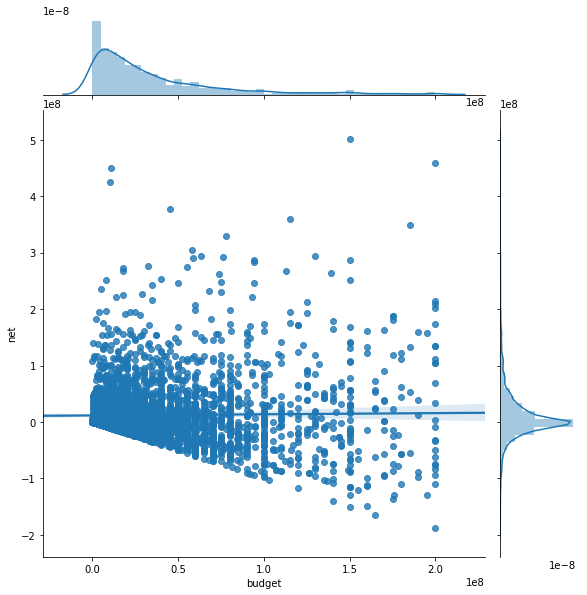

In [231]:
sns.jointplot(x=(data['budget']),y=(data['net']),kind="reg", height=8.27)   #Budget does not have an effect on net profit or loss

<Figure size 1800x800 with 0 Axes>

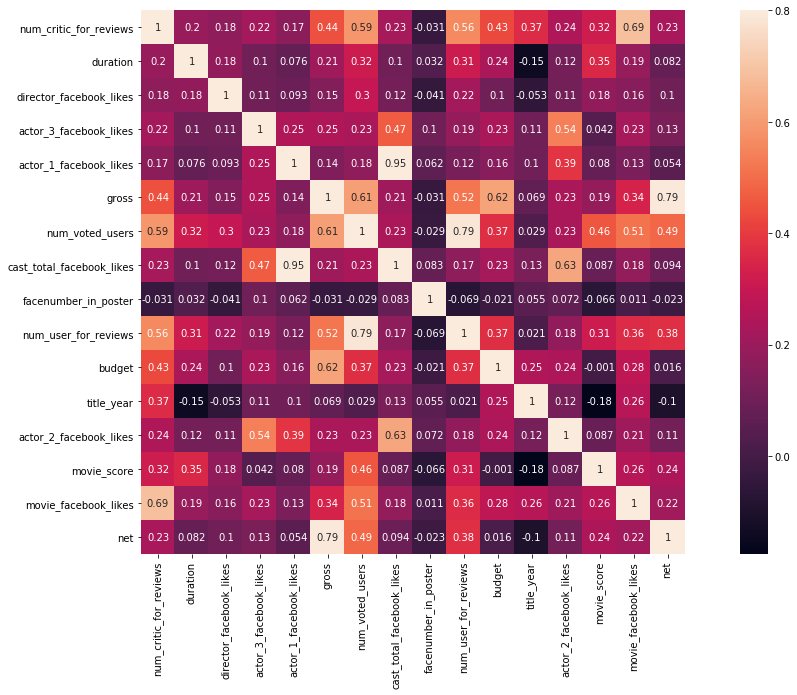

In [232]:
#Plotting heat map for all non null values:
plt.figure(figsize=(18,8),dpi=100,)
plt.subplots(figsize=(20,10))
sns.heatmap(data=data.corr(),square=True,vmax=0.8,annot=True)

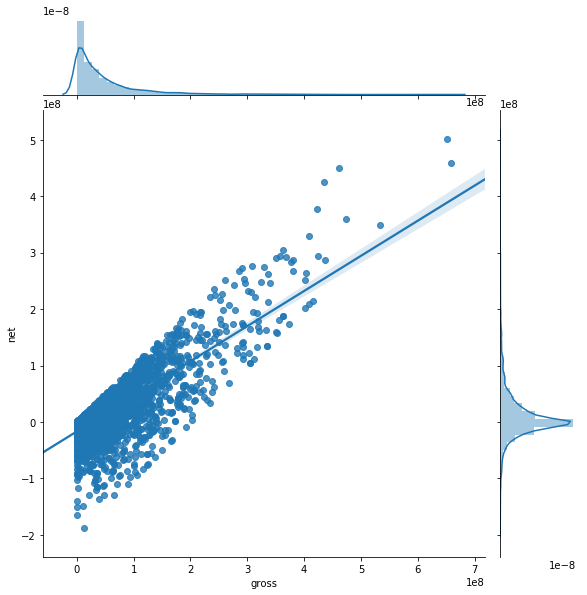

In [233]:
sns.jointplot(x=(data['gross']),y=(data['net']),kind="reg", height=8.27)   #Higher budget can mean higher gross

In [234]:
movie_data_sp = data      #New dataframe to split genres

In [213]:
# Split genres and create a new entry for each of the genre a movie falls into
s = movie_data_sp['genres'].str.split('|').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genres'
del movie_data_sp['genres']
md_split_genres = movie_data_sp.join(s)

In [214]:
md_split_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12176 entries, 0 to 4126
Data columns (total 24 columns):
director_name                12176 non-null object
num_critic_for_reviews       12176 non-null float64
duration                     12176 non-null float64
director_facebook_likes      12176 non-null float64
actor_3_facebook_likes       12176 non-null float64
actor_2_name                 12176 non-null object
actor_1_facebook_likes       12176 non-null float64
gross                        12176 non-null float64
actor_1_name                 12176 non-null object
movie_title                  12176 non-null object
num_voted_users              12176 non-null int64
cast_total_facebook_likes    12176 non-null int64
actor_3_name                 12176 non-null object
facenumber_in_poster         12176 non-null float64
num_user_for_reviews         12176 non-null float64
language                     12176 non-null object
country                      12176 non-null object
content_rating     

In [215]:
md_split_genres.groupby('genres')['genres'].count()

genres
Action          987
Adventure       815
Animation       203
Biography       260
Comedy         1590
Crime           750
Documentary      72
Drama          2098
Family          475
Fantasy         536
Film-Noir         4
History         181
Horror          438
Music           172
Musical         110
Mystery         416
News              1
Romance         938
Sci-Fi          518
Short             2
Sport           162
Thriller       1187
War             183
Western          78
Name: genres, dtype: int64

In [216]:
md_split_genres['genres_cat'] = md_split_genres['genres'].astype('category').cat.codes

genres        count    encoding
Action          987     -- 0
Adventure       815     -- 1
Animation       203     -- 2
Biography       260     -- 3
Comedy         1590     -- 4
Crime           750     -- 5
Documentary      72     -- 6
Drama          2098     -- 7
Family          475     -- 8
Fantasy         536     -- 9
Film-Noir         4     -- 10
History         181     -- 11
Horror          438     -- 12
Music           172     -- 13
Musical         110     -- 14
Mystery         416     -- 15
News              1     -- 16
Romance         938     -- 17
Sci-Fi          518     -- 18
Short             2     -- 19
Sport           162     -- 20
Thriller       1187     -- 21
War             183     -- 22
Western          78     -- 23

In [817]:
data_3 = data[data['title_year']>1950]

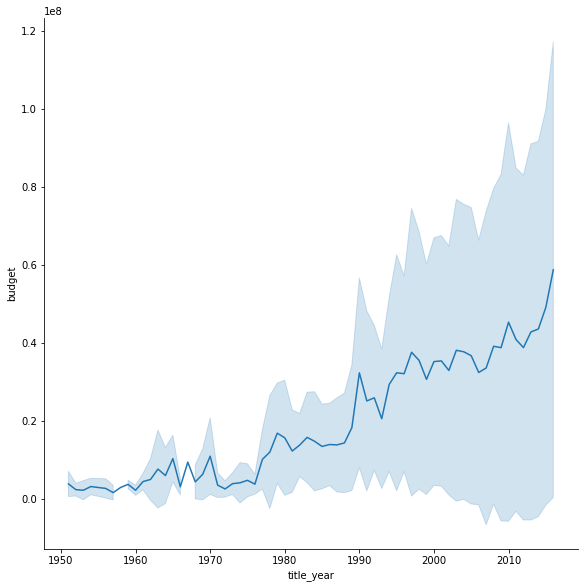

In [819]:
sns.relplot(x="title_year", y="budget", kind="line", ci="sd", data=data_3, height=8.27);

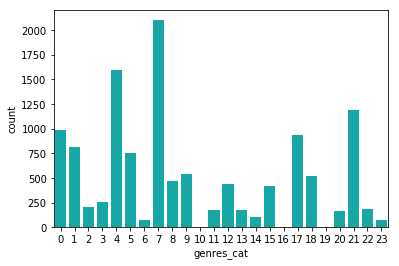

In [803]:
sns.countplot(x="genres_cat", data=md_split_genres, color="c");

In [756]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4127 entries, 0 to 4126
Data columns (total 25 columns):
color                        4127 non-null object
director_name                4127 non-null object
num_critic_for_reviews       4127 non-null float64
duration                     4127 non-null float64
director_facebook_likes      4127 non-null float64
actor_3_facebook_likes       4127 non-null float64
actor_2_name                 4127 non-null object
actor_1_facebook_likes       4127 non-null float64
gross                        4127 non-null float64
actor_1_name                 4127 non-null object
movie_title                  4127 non-null object
num_voted_users              4127 non-null int64
cast_total_facebook_likes    4127 non-null int64
actor_3_name                 4127 non-null object
facenumber_in_poster         4127 non-null float64
num_user_for_reviews         4127 non-null float64
language                     4127 non-null object
country                      4127 non

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


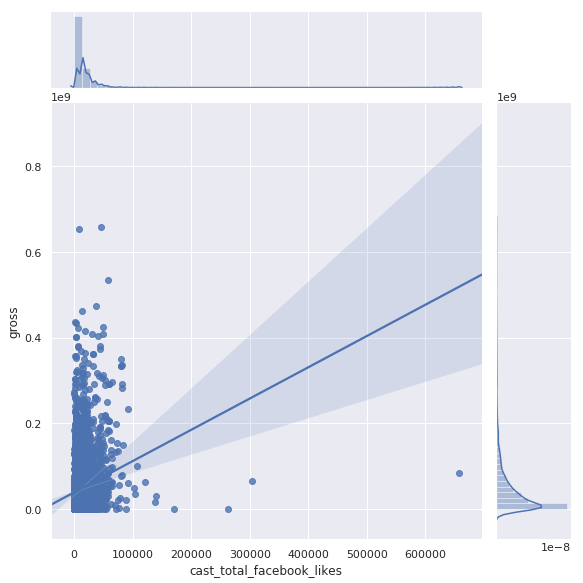

In [760]:
sns.jointplot(x=(data['cast_total_facebook_likes']),y=(data['gross']),kind="reg", height=8.27)

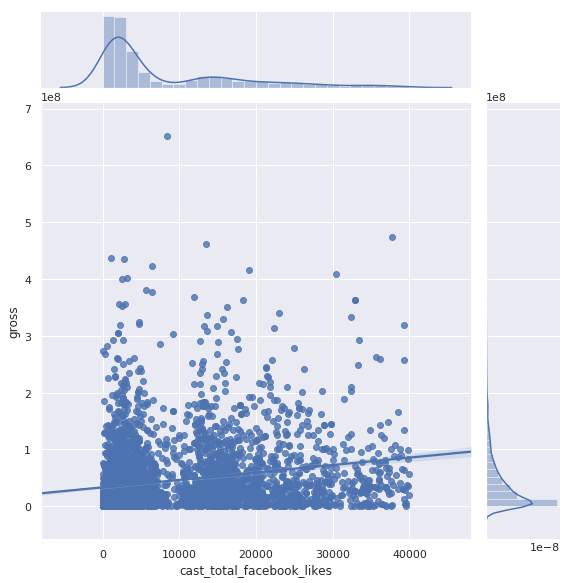

In [766]:
sns.jointplot(x=(data_2['cast_total_facebook_likes']),y=(data_2['gross']),kind="reg", height=8.27)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


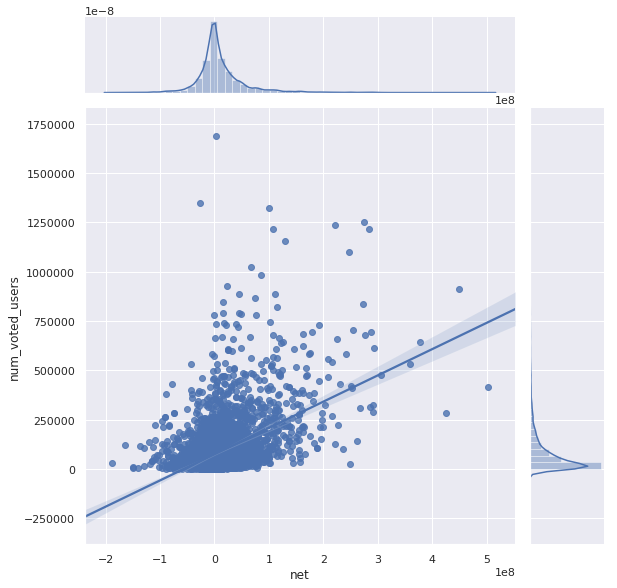

In [782]:
sns.jointplot(x=(data_2['net']),y=(data_2['num_voted_users']),kind="reg", height=8.27)

<Figure size 1800x800 with 0 Axes>

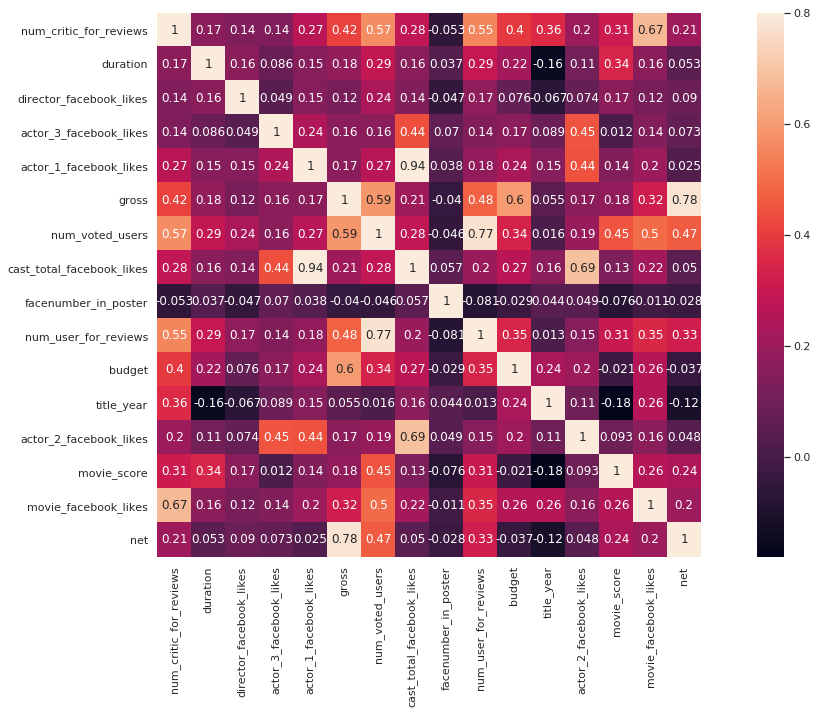

In [781]:
#Plotting heat map for all non null values:
plt.figure(figsize=(18,8),dpi=100,)
plt.subplots(figsize=(20,10))
sns.heatmap(data=data_2.corr(),square=True,vmax=0.8,annot=True)

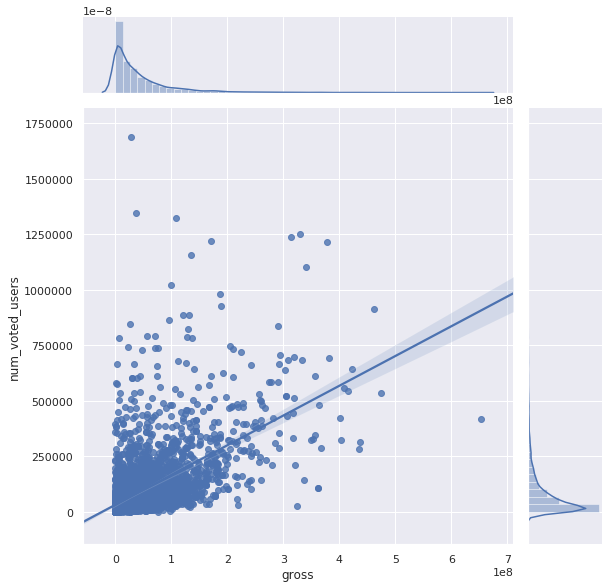

In [783]:
sns.jointplot(x=(data_2['gross']),y=(data_2['num_voted_users']),kind="reg", height=8.27)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


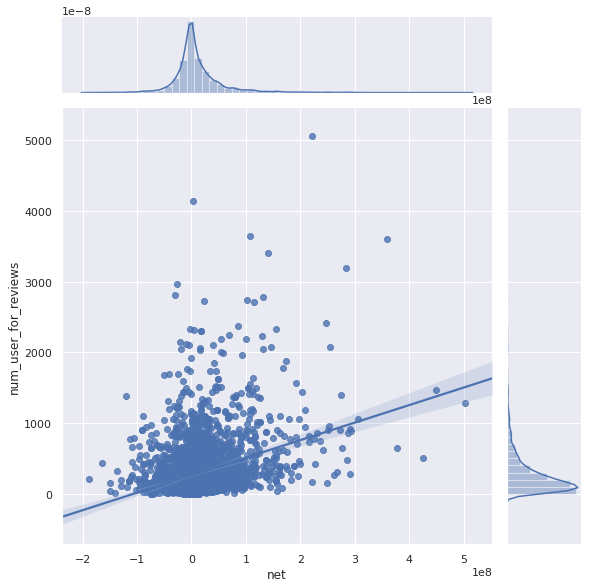

In [784]:
sns.jointplot(x=(data_2['net']),y=(data_2['num_user_for_reviews']),kind="reg", height=8.27)

# 

In [597]:
#Hypothesis       -- We define a block buster movie as follows,
#For a movie with a budget less than $5million, gross over $2million and having a profit greater than 500% of net
#For a movie with a budget more than $5mil having a profit greater than 150% of net

In [598]:
movie_data_nn = pd.DataFrame(pd.read_csv('/Users/smokha/Downloads/DSCS/movie_data_no_null.csv'))  #Read data

In [599]:
movie_data_nn.isna().sum()   #Check null values

Unnamed: 0                   0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
movie_score                  0
movie_facebook_likes         0
dtype: int64

In [600]:
movie_data_nn['net'] = (movie_data_nn['gross'] - movie_data_nn['budget'])/movie_data_nn['budget']  #Create net column
movie_data_nn['blockbuster'] = 0   

In [601]:
movie_data_nn.sort_values(by=['budget'])

,Unnamed: 0,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,movie_facebook_likes,net,blockbuster
3794,3794,Jonathan Caouette,72.0,88.0,20.0,0.0,Jonathan Caouette,58.0,592014.0,Biography|Documentary,...,English,USA,Unrated,2.180000e+02,2003.0,20.0,7.2,754,2714.660550,0
3890,3890,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,English,USA,PG,1.100000e+03,2004.0,23.0,6.6,456,76.474545,0
3883,3883,Olivier Assayas,81.0,110.0,107.0,45.0,B√©atrice Dalle,576.0,136007.0,Drama|Music|Romance,...,French,France,R,4.500000e+03,2004.0,133.0,6.9,171,29.223778,0
3888,3888,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,Spanish,USA,R,7.000000e+03,1992.0,20.0,6.9,0,290.560000,0
3887,3887,Neill Dela Llana,35.0,80.0,0.0,0.0,Edgar Tancangco,0.0,70071.0,Thriller,...,English,Philippines,Not Rated,7.000000e+03,2005.0,0.0,6.3,74,9.010143,0
3886,3886,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,...,English,USA,PG-13,7.000000e+03,2004.0,45.0,7.0,19000,59.680000,0
3889,3889,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,...,English,USA,Not Rated,9.000000e+03,2011.0,205.0,6.4,413,-0.490667,0
3882,3882,John Waters,73.0,108.0,0.0,105.0,Mink Stole,462.0,180483.0,Comedy|Crime|Horror,...,English,USA,NC-17,1.000000e+04,1972.0,143.0,6.1,0,17.048300,0
3884,3884,Jafar Panahi,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,673780.0,Drama,...,Persian,Iran,Not Rated,1.000000e+04,2000.0,0.0,7.5,697,66.378000,0
3553,3553,Hunter Richards,34.0,92.0,11.0,1000.0,Chris Evans,26000.0,12667.0,Drama|Romance,...,English,UK,R,1.400000e+04,2005.0,11000.0,6.6,0,-0.095214,0


In [602]:
#Removing outliers
movie_data_nn = movie_data_nn.drop(movie_data_nn[(movie_data_nn['budget']>200000000)].index).reset_index(drop=True)

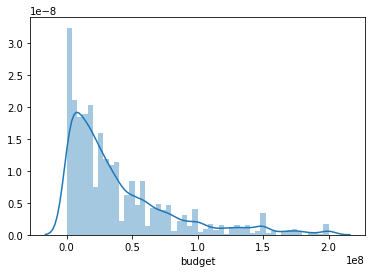

In [806]:
movie_data_nn['budget'].hist()

In [604]:
mov_l = movie_data_nn[movie_data_nn['budget']<5000000]   #Split data

In [605]:
mov_m = movie_data_nn[movie_data_nn['budget']>=5000000]        #Split data

In [606]:
mov_l.sort_values(by=['net'])

,Unnamed: 0,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,movie_facebook_likes,net,blockbuster
3660,3704,Frank Whaley,9.0,96.0,436.0,4.0,Frank Whaley,474.0,703.0,Comedy|Drama,...,English,USA,R,1500000.0,2001.0,436.0,5.4,47,-0.999531,0
4031,4306,Jonathan Wacks,13.0,93.0,0.0,482.0,Gary Farmer,12000.0,1097.0,Comedy|Horror,...,English,USA,PG-13,1800000.0,1993.0,580.0,6.1,266,-0.999391,0
3659,3703,Brian Trenchard-Smith,8.0,88.0,53.0,176.0,Mariel Hemingway,563.0,721.0,Action|Drama,...,English,Germany,R,1000000.0,2006.0,288.0,4.1,42,-0.999279,0
3578,3621,Boris Rodriguez,56.0,83.0,5.0,98.0,Thure Lindhardt,413.0,1521.0,Comedy|Horror,...,English,Canada,Not Rated,1500000.0,2012.0,197.0,5.7,932,-0.998986,0
3329,3372,Ruba Nadda,36.0,93.0,55.0,5.0,Bonnie Lee Bouman,223.0,4063.0,Drama|Mystery|Romance|Thriller,...,English,Canada,R,4000000.0,2012.0,11.0,5.2,657,-0.998984,0
3515,3558,Paul Bunnell,94.0,106.0,5.0,356.0,Kevin McCarthy,416.0,2436.0,Comedy|Fantasy|Musical|Sci-Fi,...,English,USA,Not Rated,2000000.0,2012.0,403.0,5.7,655,-0.998782,0
3543,3586,Adam Goldberg,22.0,111.0,1000.0,127.0,Marisa Coughlan,2000.0,2580.0,Drama|Mystery,...,English,USA,R,1650000.0,2003.0,163.0,5.4,63,-0.998436,0
3474,3517,Robert Fontaine,4.0,125.0,7.0,17.0,Arturo Castro,128.0,3330.0,Crime|Drama,...,English,USA,R,2100000.0,2015.0,22.0,7.2,305,-0.998414,0
3420,3463,Francesca Gregorini,21.0,96.0,15.0,357.0,Amy Sedaris,433.0,5005.0,Drama,...,English,USA,R,3000000.0,2009.0,396.0,5.9,448,-0.998332,0
3271,3314,Ernie Barbarash,29.0,103.0,249.0,261.0,Michael J. Morris,2000.0,8691.0,Action|Adventure,...,English,USA,R,4500000.0,2014.0,298.0,5.8,0,-0.998069,0


In [607]:
mov_l_ntg = mov_l[mov_l['gross']<2000000]
mov_l_g = mov_l[mov_l['gross']>=2000000]   #Split data

In [608]:
mov_l_g['blockbuster'] = mov_l_g['net'].apply(lambda x: 1 if x>=5 else 0)   #Setting blockbuster condition

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [609]:
mov_l = pd.concat([mov_l_g, mov_l_ntg])

In [610]:
mov_l.groupby('blockbuster')['blockbuster'].count()

blockbuster
0    519
1    184
Name: blockbuster, dtype: int64

In [611]:
mov_m['blockbuster'] = mov_m['net'].apply(lambda x: 1 if x>=1.5 else 0)  #Setting blockbuster condition

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [612]:
mov_m.groupby('blockbuster')['blockbuster'].count()

blockbuster
0    2789
1     635
Name: blockbuster, dtype: int64

In [613]:
movie_data_nn = pd.concat([mov_l, mov_m])

In [614]:
movie_data_nn.groupby('blockbuster')['blockbuster'].count()

blockbuster
0    3308
1     819
Name: blockbuster, dtype: int64

In [615]:
movie_data_nn = movie_data_nn.drop(columns=['Unnamed: 0', 'director_name', 'actor_2_name', 'actor_1_name', 'actor_3_name', 'movie_title'], axis = 1)   #Drop unecessary columns

In [616]:
movie_data_nn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4127 entries, 1052 to 4124
Data columns (total 21 columns):
num_critic_for_reviews       4127 non-null float64
duration                     4127 non-null float64
director_facebook_likes      4127 non-null float64
actor_3_facebook_likes       4127 non-null float64
actor_1_facebook_likes       4127 non-null float64
gross                        4127 non-null float64
genres                       4127 non-null object
num_voted_users              4127 non-null int64
cast_total_facebook_likes    4127 non-null int64
facenumber_in_poster         4127 non-null float64
num_user_for_reviews         4127 non-null float64
language                     4127 non-null object
country                      4127 non-null object
content_rating               4127 non-null object
budget                       4127 non-null float64
title_year                   4127 non-null float64
actor_2_facebook_likes       4127 non-null float64
movie_score                  41

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


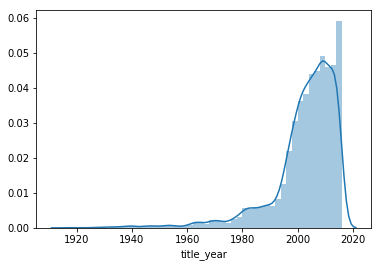

In [807]:
sns.distplot(movie_data['title_year'])

In [618]:
movie_data_nn['year_bin'] = pd.cut(movie_data_nn['title_year'], 20)   #Creating bins for title year

In [619]:
movie_data_nn.groupby('year_bin')['year_bin'].count()

year_bin
(1915.9, 1921.0]      2
(1921.0, 1926.0]      1
(1926.0, 1931.0]      2
(1931.0, 1936.0]      5
(1936.0, 1941.0]     10
(1941.0, 1946.0]      7
(1946.0, 1951.0]      7
(1951.0, 1956.0]     12
(1956.0, 1961.0]     11
(1961.0, 1966.0]     33
(1966.0, 1971.0]     36
(1971.0, 1976.0]     38
(1976.0, 1981.0]     92
(1981.0, 1986.0]    133
(1986.0, 1991.0]    152
(1991.0, 1996.0]    297
(1996.0, 2001.0]    735
(2001.0, 2006.0]    927
(2006.0, 2011.0]    895
(2011.0, 2016.0]    732
Name: year_bin, dtype: int64

In [620]:
movie_data_nn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4127 entries, 1052 to 4124
Data columns (total 22 columns):
num_critic_for_reviews       4127 non-null float64
duration                     4127 non-null float64
director_facebook_likes      4127 non-null float64
actor_3_facebook_likes       4127 non-null float64
actor_1_facebook_likes       4127 non-null float64
gross                        4127 non-null float64
genres                       4127 non-null object
num_voted_users              4127 non-null int64
cast_total_facebook_likes    4127 non-null int64
facenumber_in_poster         4127 non-null float64
num_user_for_reviews         4127 non-null float64
language                     4127 non-null object
country                      4127 non-null object
content_rating               4127 non-null object
budget                       4127 non-null float64
title_year                   4127 non-null float64
actor_2_facebook_likes       4127 non-null float64
movie_score                  41

In [621]:
movie_data_nn['language'] = movie_data_nn['language'].apply(lambda x: 'English' if x =='English' else 'Others')  #Convert data

In [622]:
def country(x):    #Function to convert country data
    if x != 'UK' and x != 'Canada' and x != 'Australia' and x != 'France' and x != 'Germany' and x != 'USA':
        x = 'Others'  
    return x

movie_data_nn['country'] = movie_data_nn['country'].apply(lambda x: country(x))

In [623]:
def rating(x):    #Function to convert country data
    if x != 'PG-13' and x != 'PG' and x != 'G' and x != 'Not Rated' and x != 'Unrated' and x != 'R':
        x = 'Others' 
        
    if x == 'Not Rated':
        x = 'Unrated'
    return x

movie_data_nn['content_rating'] = movie_data_nn['content_rating'].apply(lambda x: rating(x))

In [624]:
movie_data_nn['duration_bins'] = pd.cut(movie_data_nn['duration'], 12)

In [625]:
# Split genres and create a new entry for each of the genre a movie falls into
s = movie_data_nn['genres'].str.split('|').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genres'
del movie_data_nn['genres']
movie_data_nn = movie_data_nn.join(s)

In [626]:
movie_data_nn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12176 entries, 0 to 4126
Data columns (total 23 columns):
num_critic_for_reviews       12176 non-null float64
duration                     12176 non-null float64
director_facebook_likes      12176 non-null float64
actor_3_facebook_likes       12176 non-null float64
actor_1_facebook_likes       12176 non-null float64
gross                        12176 non-null float64
num_voted_users              12176 non-null int64
cast_total_facebook_likes    12176 non-null int64
facenumber_in_poster         12176 non-null float64
num_user_for_reviews         12176 non-null float64
language                     12176 non-null object
country                      12176 non-null object
content_rating               12176 non-null object
budget                       12176 non-null float64
title_year                   12176 non-null float64
actor_2_facebook_likes       12176 non-null float64
movie_score                  12176 non-null float64
movie_facebook_

In [627]:
cols_ohc = ['content_rating', 'language', 'country', 'genres', 'duration_bins', 'year_bin']

In [628]:
md1 = pd.get_dummies(movie_data_nn, prefix_sep="__", columns=cols_ohc)  #Creating dummy variables

In [629]:
md1 = md1.drop(columns=['duration', 'title_year', 'net'], axis=1)  #Drop unecessary columns

In [630]:
md1['gross'] = md1['gross']/1000000      #Scaling down values
md1['budget'] = md1['budget']/1000000

In [631]:
y = md1.pop('blockbuster')       #Sepereate feature matrix and output
x = md1

In [670]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.7, random_state = 1)    #Train test split

In [671]:
logreg=LogisticRegression()  

In [672]:
logreg.fit(x_train,y_train)             #Fit logistic regression to train data

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [673]:
predictions = logreg.predict(x_test)       #Logistic regression prediction

In [674]:
score = logreg.score(x_test, y_test)  #Prediction Score
print(score)

0.9753636790239324


In [675]:
cm = metrics.confusion_matrix(y_test, predictions)       #Confusion matrix
print(cm)  

[[6910   60]
 [ 150 1404]]


In [678]:
X2 = sm.add_constant(x)    #OLS regression to get F-statistics and t-statistics
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            blockbuster   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     98.68
Date:                Thu, 04 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:45:23   Log-Likelihood:                -2751.4
No. Observations:               12176   AIC:                             5661.
Df Residuals:                   12097   BIC:                             6246.
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [677]:
x_train.shape

(3652, 84)

In [ ]:
##Logistic regression without 'Gross' variable
#x.pop('gross')

In [685]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.7, random_state = 1)

In [686]:
logreg.fit(x_train,y_train)
predictions = logreg.predict(x_test)
score = logreg.score(x_test, y_test)
print(score)

0.8295401220084467


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [687]:
cm = metrics.confusion_matrix(y_test, predictions)  #Confusion matrix
print(cm)

[[6802  168]
 [1285  269]]


In [688]:
X2 = sm.add_constant(x)   #OLS regression to get F-statistics and t-statistics
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            blockbuster   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     50.31
Date:                Thu, 04 Jul 2019   Prob (F-statistic):               0.00
Time:                        19:16:25   Log-Likelihood:                -4058.0
No. Observations:               12176   AIC:                             8272.
Df Residuals:                   12098   BIC:                             8850.
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [740]:
from sklearn.decomposition import PCA

In [760]:
x2 = x       #PCA for dimensionality reduction
pca = PCA(n_components=3)
x2 = pca.fit_transform(x)

In [756]:
x4 = sm.add_constant(x2)
est = sm.OLS(y, x4)   #OLS regression to get F-statistics and t-statistics
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            blockbuster   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     219.6
Date:                Thu, 04 Jul 2019   Prob (F-statistic):          9.44e-139
Time:                        20:00:18   Log-Likelihood:                -5428.2
No. Observations:               12176   AIC:                         1.086e+04
Df Residuals:                   12172   BIC:                         1.089e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1846      0.003     53.901      0.0

In [774]:
ridge = Ridge(alpha=1.0)
ridge.fit(x,y)    #Ridge regression for diamensionality regression

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [775]:
# A helper method for pretty-printing the coefficients
def pretty_print_coefs(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

print ("Ridge model:", pretty_print_coefs(ridge.coef_))

Ridge model: 0.0 * X0 + -0.0 * X1 + -0.0 * X2 + -0.0 * X3 + 0.0 * X4 + 0.0 * X5 + -0.004 * X6 + 0.0 * X7 + -0.003 * X8 + -0.0 * X9 + 0.004 * X10 + -0.0 * X11 + 0.064 * X12 + 0.111 * X13 + 0.016 * X14 + -0.014 * X15 + -0.084 * X16 + -0.093 * X17 + 0.0 * X18 + -0.0 * X19 + 0.001 * X20 + -0.034 * X21 + 0.003 * X22 + 0.007 * X23 + -0.017 * X24 + -0.022 * X25 + 0.062 * X26 + -0.042 * X27 + -0.015 * X28 + 0.041 * X29 + -0.001 * X30 + 0.03 * X31 + -0.047 * X32 + 0.084 * X33 + -0.017 * X34 + 0.054 * X35 + -0.006 * X36 + -0.005 * X37 + -0.026 * X38 + 0.037 * X39 + 0.114 * X40 + -0.055 * X41 + -0.011 * X42 + -0.06 * X43 + 0.017 * X44 + -0.074 * X45 + 0.056 * X46 + 0.048 * X47 + -0.037 * X48 + -0.013 * X49 + -0.073 * X50 + -0.116 * X51 + 0.129 * X52 + 0.098 * X53 + 0.097 * X54 + 0.05 * X55 + 0.11 * X56 + -0.007 * X57 + -0.026 * X58 + -0.14 * X59 + -0.058 * X60 + -0.058 * X61 + -0.079 * X62 + 0.083 * X63 + 0.538 * X64 + 0.069 * X65 + -0.082 * X66 + 0.046 * X67 + -0.047 * X68 + -0.325 * X69 + 0.247

In [776]:
test = SelectKBest(score_func=chi2, k=4)   #KBest regression for diamensionality regression
fit = test.fit(x,y)

In [777]:
print(fit.scores_)

[4.71850567e+03 1.64513146e+05 4.92275023e+03 1.01815149e+01
 1.20392747e+08 5.25995334e+03 1.53338055e+01 1.44975249e+05
 2.16671776e+04 1.10485110e+03 6.08270135e+01 3.75705171e+06
 2.62742305e+01 1.71461697e+02 8.03939896e-01 7.72094972e+00
 2.50675931e+00 3.99181441e+00 1.96693785e+00 4.23838682e+01
 7.11806624e-01 1.81075658e+01 2.24627513e+01 2.43663252e+01
 3.73054849e+01 4.63760799e+00 2.24824058e+01 1.76605454e+01
 1.70654305e+00 6.56466319e-01 6.38059520e-01 6.50052259e+00
 7.69173409e+00 1.26781407e+00 1.01279356e-01 1.21030117e+00
 1.34235524e-02 1.13560698e-01 2.60021576e+00 3.81190789e+01
 1.74305993e+01 1.72721459e-01 1.63085632e-01 2.26430298e-01
 2.24919201e+00 3.54911067e+00 4.52860596e-01 1.52113007e+00
 5.78462040e+00 1.21542118e+00 1.67109714e-01 4.52860596e+00
 1.00290979e+01 1.55552641e+00 8.54092644e-02 2.32547356e+00
 3.82387740e+01 1.28711734e+00 5.51621717e-01 8.78209227e-04
 1.35858179e+00 8.81394200e-01 1.13215149e+00 1.54067062e+00
 1.32491103e+01 2.642800